# Discord Data Analysis

In [6]:
import pandas as pd

In [10]:
# Define chunk size (adjust as needed)
chunk_size = 10000  # Number of rows to read at a time
# Initialize an empty DataFrame to store the concatenated chunks
all_chunks = []
# Create a CSV file iterator
iterator =pd.read_csv('discordoutput.csv',chunksize=chunk_size)
# Iterate through chunks and process each chunk
for chunk in iterator:
    # Process the chunk as needed (e.g., perform calculations, filtering, etc.)
    # For example, you can append it to the list of chunks for further processing
    all_chunks.append(chunk)
# Concatenate all chunks into a single DataFrame
df = pd.concat(all_chunks)
# Now you can work with the entire DataFrame

In [11]:
# df=pd.read_csv('completedata.csv')

In [12]:
df.drop('Unnamed: 0',inplace=True,axis=1)

In [13]:
df.head()

,id,user_name,created_at,external_link,content,status,user_avatar,is_public,source_platform,doc_type,...,user_roles,has_attachments,created_at_str,community_name,community_id,parent_doc_id,attachments,title,thread_id,entities
0,id:uds:uds::1097755488436887642,VACHAN,1681795703,https://discord.com/channels/99774894902267090...,Rpg rd,publish,https://cdn.discordapp.com/avatars/10974621971...,False,Discord,text,...,"['@everyone', '📍warriors📍']",False,2023-04-18T05:28:23.754000+00:00,🍅Fruits Hour🍅,997748949022670909,NaN,NaN,NaN,NaN,NaN
1,id:uds:uds::1079222135001710662,megz,1677377007,https://discord.com/channels/75779462805664572...,I was waiting for it to go back down to 1 tick...,publish,NaN,False,Discord,forum,...,NaN,False,2023-02-26T02:03:27.962000+00:00,✦﹒Sweetener,757794628056645722,1.075646e+18,NaN,NaN,NaN,NaN
2,id:uds:uds::1093955826173095990,🖤Umbrå🖤,1680889793,https://discord.com/channels/99774894902267090...,Is dark better than ice?,publish,https://cdn.discordapp.com/avatars/81824830153...,False,Discord,text,...,"['@everyone', '📍warriors📍', 'North America', '...",False,2023-04-07T17:49:53.676000+00:00,🍅Fruits Hour🍅,997748949022670909,NaN,NaN,NaN,NaN,NaN
3,id:uds:uds::1102786417052102666,Mizyu,1682995170,https://discord.com/channels/99774894902267090...,a10 to 11?,publish,https://cdn.discordapp.com/avatars/54297301076...,False,Discord,text,...,"['@everyone', '_____----- PING ROLES -----__...",False,2023-05-02 02:39:30.606000+00:00,🍅Fruits Hour🍅,997748949022670909,NaN,NaN,NaN,NaN,NaN
4,id:uds:uds::1092956177933021284,Mooseegg,1680651458,https://discord.com/channels/85484326836515642...,Also known as “Mason Dixon Lime”,publish,https://cdn.discordapp.com/avatars/32874311128...,False,Discord,text,...,"['@everyone', 'TDI Updates', 'OG', 'ITG Member...",False,2023-04-04T23:37:38.963000+00:00,Independent Traders Guild (ITG),854843268365156422,NaN,NaN,NaN,NaN,NaN


### Cheaking the Null Values Percentage

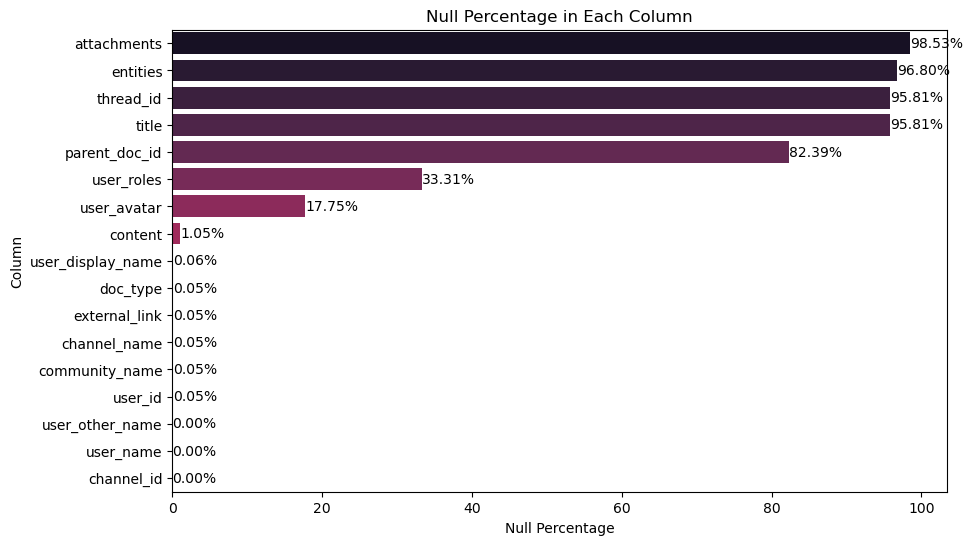

,Column,Null Percentage
attachments,attachments,98.532094
entities,entities,96.804633
thread_id,thread_id,95.809701
title,title,95.809396
parent_doc_id,parent_doc_id,82.391332
user_roles,user_roles,33.306995
user_avatar,user_avatar,17.752318
content,content,1.046863
user_display_name,user_display_name,0.057165
doc_type,doc_type,0.054371


In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def null_percentage(df):
    # Calculate the total number of rows in the DataFrame
    total_rows = len(df)
    
    # Calculate the percentage of null values for each column
    percentages = (df.isnull().sum() / total_rows) * 100
    
    # Create a new DataFrame to store the results and exclude columns with no null values
    result_df = pd.DataFrame({'Column': df.columns, 'Null Percentage': percentages})
    result_df = result_df[result_df['Null Percentage'] > 0]  # Exclude columns with 0% nulls
    
    if result_df.empty:
        print("No columns with null values found.")
        return result_df
    
    # Sort the DataFrame by Null Percentage in descending order for better visualization
    result_df = result_df.sort_values(by='Null Percentage', ascending=False)
    
    # Create a beautiful bar chart using Seaborn with the 'rocket' color palette
    plt.figure(figsize=(10, 6))
    ax = sns.barplot(x='Null Percentage', y='Column', data=result_df, palette='rocket')
    plt.xlabel('Null Percentage')
    plt.ylabel('Column')
    plt.title('Null Percentage in Each Column')
    
    # Display percentage values on the bars
    for p in ax.patches:
        width = p.get_width()
        ax.annotate(f'{width:.2f}%', (width, p.get_y() + p.get_height()/2), ha='left', va='center', color='black')
    
    plt.show()

    return result_df

# Example usage:
# Assuming you have a DataFrame called 'my_data'
result = null_percentage(df)
result

In [15]:
df.isnull().sum()

id                         0
user_name                 55
created_at                 0
external_link           1070
content                20602
status                     0
user_avatar           349361
is_public                  0
source_platform            0
doc_type                1070
user_other_name           55
channel_id                 1
user_display_name       1125
user_id                 1067
channel_name            1070
user_roles            655473
has_attachments            0
created_at_str             0
community_name          1070
community_id               0
parent_doc_id        1621440
attachments          1939086
title                1885504
thread_id            1885510
entities             1905090
dtype: int64

### Checking for duplicate

In [16]:
df[df.duplicated('id')]

,id,user_name,created_at,external_link,content,status,user_avatar,is_public,source_platform,doc_type,...,user_roles,has_attachments,created_at_str,community_name,community_id,parent_doc_id,attachments,title,thread_id,entities


In [17]:
df.columns

Index(['id', 'user_name', 'created_at', 'external_link', 'content', 'status',
       'user_avatar', 'is_public', 'source_platform', 'doc_type',
       'user_other_name', 'channel_id', 'user_display_name', 'user_id',
       'channel_name', 'user_roles', 'has_attachments', 'created_at_str',
       'community_name', 'community_id', 'parent_doc_id', 'attachments',
       'title', 'thread_id', 'entities'],
      dtype='object')

### Document ID Validation

In [18]:
df.shape

(1967974, 25)

In [20]:
import re

def check_doc_id_format(df):
    # Regular expression pattern for valid document IDs
    regex_pattern = r"id:uds:uds::[A-Za-z0-9]+"

    valid_count = 0
    invalid_count = 0

    # Loop through each document ID in the DataFrame
    for doc_id in df.id:
        # Check if the ID matches the regex pattern
        if re.match(regex_pattern, doc_id):
            valid_count += 1
        else:
            invalid_count += 1

    print("Documents with valid IDs:", valid_count)
    print("Documents with invalid IDs:", invalid_count)

    # Return the counts as a tuple
    return valid_count, invalid_count

# Example usage:
# Assuming you have a DataFrame called 'my_data'
valid_count, invalid_count = check_doc_id_format(df)

Documents with valid IDs: 1967974
Documents with invalid IDs: 0


### Doc_Type Validation

In [21]:
def validate_doc_types(df, valid_doc_types):
    # Get the set of all values in the doc_type field
    all_doc_types = set(df['doc_type'])

    # Initialize a dictionary to store counts of valid and invalid document types
    counts = {'Valid': 0, 'Invalid': 0}
    
    # Initialize a list to store invalid document types
    invalid_doc_types = []

    # Loop through each document type
    for doc_type in all_doc_types:
        # Check if the document type is a valid string and in the set of valid document types
        if isinstance(doc_type, str) and doc_type in valid_doc_types:
            counts['Valid'] += 1
        else:
            counts['Invalid'] += 1
            invalid_doc_types.append(doc_type)

    # Print the counts
    print("Counts of Document Types:")
    print("------------------------")
    for doc_type, count in counts.items():
        print(f"{doc_type}: {count}")
    
    # Print the list of invalid document types
    if counts['Invalid'] > 0:
        print("\nInvalid Document Types:")
        print("-----------------------")
        for invalid_type in invalid_doc_types:
            print(invalid_type)

# Example usage:
# Assuming you have a DataFrame called 'my_data' and a set of valid document types
valid_document_types =['text', 'forum', 'public_thread', 'news', 'stage_voice','voice','post','video','wiki','comment','webpage']
validate_doc_types(df, valid_document_types)

Counts of Document Types:
------------------------
Valid: 6
Invalid: 1

Invalid Document Types:
-----------------------
nan


### Doc_type percentage distribution

In [22]:
(df.doc_type[~df.doc_type.isnull()].value_counts()/df.doc_type[~df.doc_type.isnull()].shape[0])*100

doc_type
text             81.920572
forum            17.802496
news              0.155066
voice             0.076262
public_thread     0.041029
stage_voice       0.004576
Name: count, dtype: float64

### Calculate null value percentage for each doc_type

In [23]:
# Calculate null value percentage for each doc_type
null_percentage = df.groupby('doc_type')[['attachments','entities','thread_id','parent_doc_id','user_id','user_name','external_link','channel_name','title','source_platform','content']].apply(lambda x: round((x.isnull().sum() / len(x)) * 100, 2))

In [24]:
# Calculate null value percentage for each doc_type
null_percentage = df.groupby('doc_type')[[
    'user_name','content','parent_doc_id','attachments',
    'title','thread_id','entities','channel_name',
    'title','source_platform','content']].apply(lambda x: round((x.isnull().sum() / len(x)) * 100, 2))

In [25]:
null_percentage

,user_name,content,parent_doc_id,attachments,title,thread_id,entities,channel_name,title,source_platform,content
doc_type,,,,,,,,,,,
forum,0.02,3.68,8.19,99.20,81.57,81.57,82.05,0.0,81.57,0.0,3.68
news,0.00,0.07,95.31,90.16,98.98,98.98,100.00,0.0,98.98,0.0,0.07
public_thread,0.00,1.73,0.99,100.00,98.88,98.88,99.38,0.0,98.88,0.0,1.73
stage_voice,0.00,1.11,100.00,100.00,100.00,100.00,100.00,0.0,100.00,0.0,1.11
text,0.00,0.48,98.50,98.41,98.89,98.89,100.00,0.0,98.89,0.0,0.48
voice,0.00,0.40,100.00,98.80,100.00,100.00,100.00,0.0,100.00,0.0,0.40


### Heatmap for the above datapoints

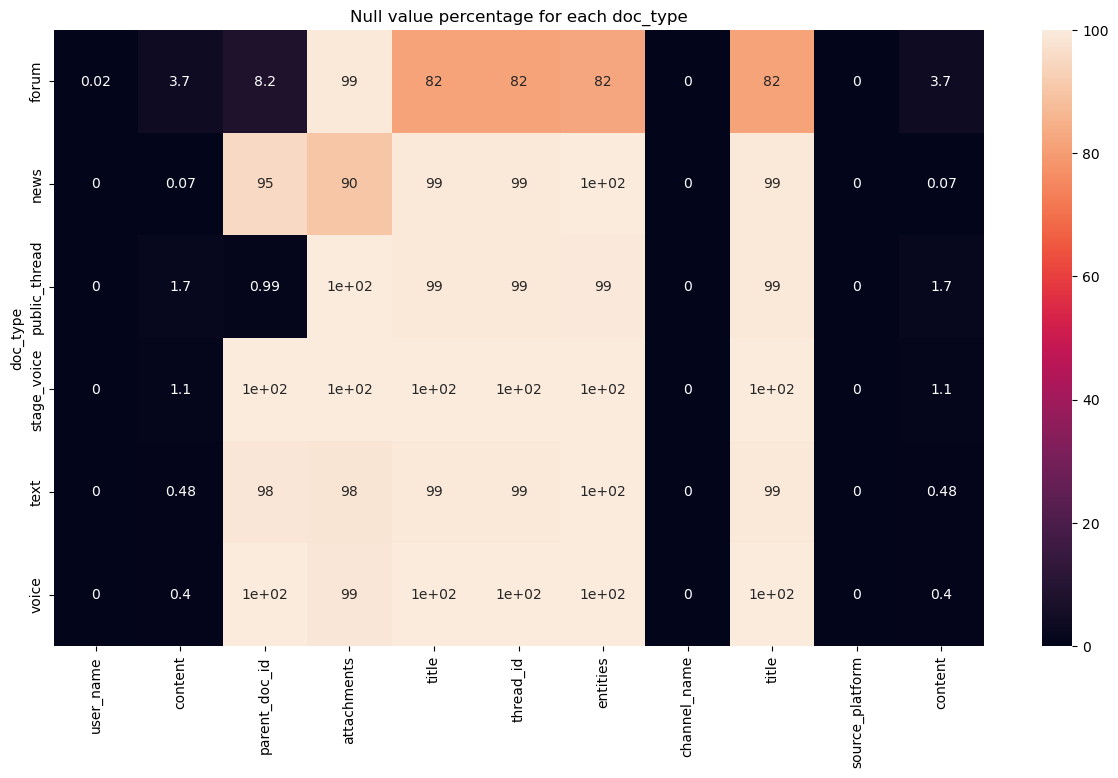

In [26]:
plt.figure(figsize=(15,8))
plt.title('Null value percentage for each doc_type')
sns.heatmap(null_percentage,annot=True)
plt.show()

In [27]:
filtered_df = df[df['entities'].apply(lambda x: isinstance(x, list))]

In [28]:
filtered_df

,id,user_name,created_at,external_link,content,status,user_avatar,is_public,source_platform,doc_type,...,user_roles,has_attachments,created_at_str,community_name,community_id,parent_doc_id,attachments,title,thread_id,entities


### Entities Validation 

C:\Users\shukl\AppData\Local\Temp\ipykernel_4636\2059097579.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['entities'][~dataframe['entities'].isnull()] = dataframe['entities'][~dataframe['entities'].isnull()].apply(lambda x: eval(x))


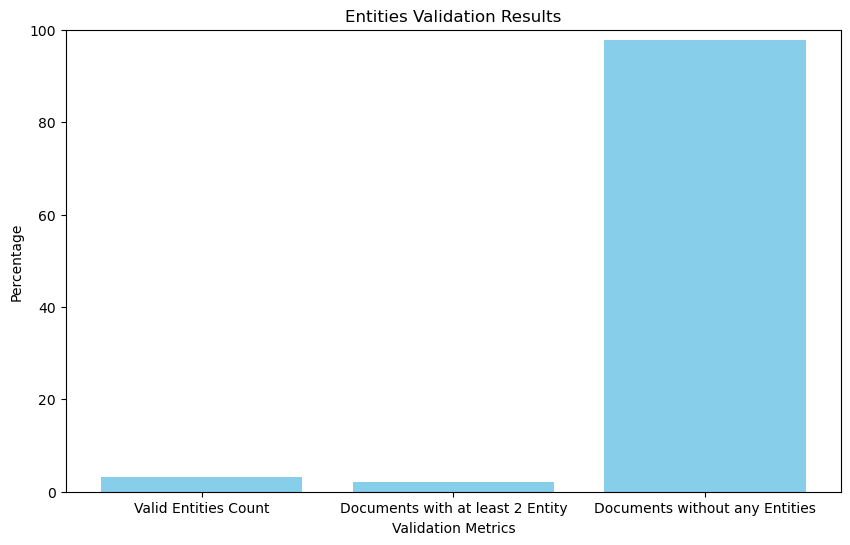

{'Total Documents': 1967974,
 'Valid Entities Percentage': 3.2,
 'Documents with at least 2 Entity Percentage': 2.13,
 'Documents without any Entities Percentage': 97.87}

In [29]:
import pandas as pd
import matplotlib.pyplot as plt

def entities_validation(dataframe):
    # Check if the 'entities' column is present in the DataFrame
    if 'entities' not in dataframe.columns:
        return "The 'entities' column does not exist in the DataFrame."

    # Filter out rows where 'entities' is not null and is an array
    valid_entities_count = 0
    valid_documents_with_entities = 0
    
    try:
        # Convert strings to lists using eval for the 'entities' column
        dataframe['entities'][~dataframe['entities'].isnull()] = dataframe['entities'][~dataframe['entities'].isnull()].apply(lambda x: eval(x))
        for entities_list in dataframe['entities']:
            if isinstance(entities_list, list) and len(entities_list) > 0:
                valid_entities_count += 1
                if len(entities_list) > 1:
                    valid_documents_with_entities += 1

        total_documents = len(dataframe)

        # Calculate percentages
        valid_entities_percentage = (valid_entities_count / total_documents) * 100
        valid_documents_with_entities_percentage = (valid_documents_with_entities / total_documents) * 100
        documents_without_entities_percentage = 100 - valid_documents_with_entities_percentage

        # Create a bar chart to visualize the validation results
        plt.figure(figsize=(10, 6))
        validation_results = {
            "Valid Entities Count": valid_entities_percentage,
            "Documents with at least 2 Entity": valid_documents_with_entities_percentage,
            "Documents without any Entities": documents_without_entities_percentage
        }
        plt.bar(validation_results.keys(), validation_results.values(), color='skyblue')
        plt.xlabel('Validation Metrics')
        plt.ylabel('Percentage')
        plt.title('Entities Validation Results')
        plt.ylim(0, 100)  # Set the y-axis range to 0-100 for percentages
        plt.show()

        return {
            "Total Documents": total_documents,
            "Valid Entities Percentage": round(valid_entities_percentage,2),
            "Documents with at least 2 Entity Percentage": round(valid_documents_with_entities_percentage,2),
            "Documents without any Entities Percentage": round(documents_without_entities_percentage,2)
        }
    
    except:
        
        for entities_list in dataframe['entities']:
            if isinstance(entities_list, list):
                valid_entities_count += 1
                if len(entities_list) > 1:
                    valid_documents_with_entities += 1

        total_documents = len(dataframe)

        # Calculate percentages
        valid_entities_percentage = (valid_entities_count / total_documents) * 100
        valid_documents_with_entities_percentage = (valid_documents_with_entities / total_documents) * 100
        documents_without_entities_percentage = 100 - valid_documents_with_entities_percentage

        # Create a bar chart to visualize the validation results
        plt.figure(figsize=(10, 6))
        validation_results = {
            "Valid Entities Count": valid_entities_percentage,
            "Documents with at least 2 Entity": valid_documents_with_entities_percentage,
            "Documents without any Entities": documents_without_entities_percentage
        }
        plt.bar(validation_results.keys(), validation_results.values(), color='skyblue')
        plt.xlabel('Validation Metrics')
        plt.ylabel('Percentage')
        plt.title('Entities Validation Results')
        plt.ylim(0, 100)  # Set the y-axis range to 0-100 for percentages
        plt.show()

        return {
            "Total Documents": total_documents,
            "Valid Entities Percentage": round(valid_entities_percentage,2),
            "Documents with at least 2 Entity Percentage": round(valid_documents_with_entities_percentage,2),
            "Documents without any Entities Percentage": round(documents_without_entities_percentage,2)
        }

# Example usage:
# Assuming you have a DataFrame called 'my_data'
result = entities_validation(df)
result


In [30]:
df.source_platform.unique()

array(['Discord'], dtype=object)

### Source Platform Validation

In [31]:
import pandas as pd

def source_platform_validation(dataframe, valid_platforms):
    # Check if the 'source_platform' column is present in the DataFrame
    if 'source_platform' not in dataframe.columns:
        return "The 'source_platform' column does not exist in the DataFrame."

    # Filter out rows where 'source_platform' is not null
    valid_platform_count = 0
    invalid_platform_count = 0
    invalid_platforms = []

    for platform in dataframe['source_platform']:
        if isinstance(platform, str) and platform in valid_platforms:
            valid_platform_count += 1
        else:
            invalid_platform_count += 1
            invalid_platforms.append(platform)

    total_documents = len(dataframe)

    return {
        "Total Documents": total_documents,
        "Valid Platform Count": valid_platform_count,
        "Invalid Platform Count": invalid_platform_count,
        "Invalid Platforms": set(invalid_platforms)
    }

# Example usage:
# Assuming you have a DataFrame called 'my_data' and a list of valid platforms
valid_platforms = ["Discord",'fandom','offcial','maxroll','reddit','youtube']
result = source_platform_validation(df, valid_platforms)
result


{'Total Documents': 1967974,
 'Valid Platform Count': 1967974,
 'Invalid Platform Count': 0,
 'Invalid Platforms': set()}

In [32]:
df[['created_at_str','created_at']].dtypes

created_at_str    object
created_at         int64
dtype: object

In [33]:
pd.to_datetime(df['created_at'], errors='coerce')

0         1970-01-01 00:00:01.681795703
1         1970-01-01 00:00:01.677377007
2         1970-01-01 00:00:01.680889793
3         1970-01-01 00:00:01.682995170
4         1970-01-01 00:00:01.680651458
                       ...             
1967969   1970-01-01 00:00:01.680399231
1967970   1970-01-01 00:00:01.682808365
1967971   1970-01-01 00:00:01.681486040
1967972   1970-01-01 00:00:01.680948006
1967973   1970-01-01 00:00:01.682643670
Name: created_at, Length: 1967974, dtype: datetime64[ns]

### Validate Dates And Timestamps

In [34]:
import pandas as pd
from datetime import datetime

def validate_dates_and_timestamps(dataframe):
    # Check if the 'created_at' and 'created_at_str' columns are present in the DataFrame
    if 'created_at' not in dataframe.columns or 'created_at_str' not in dataframe.columns:
        return "The required columns 'created_at' and 'created_at_str' do not exist in the DataFrame."

    # Convert 'created_at' to datetime and handle invalid values with 'coerce'
    dates = pd.to_datetime(dataframe['created_at'], errors='coerce')

    current_datetime = datetime.now()

    valid_dates = 0
    invalid_dates = 0

    for date in dates:
        if date < current_datetime:
            valid_dates += 1
        else:
            invalid_dates += 1

    v_d = 0
    iv_d = 0

    for created_at, created_at_str in zip(dates, dataframe['created_at_str']):
        x = str(created_at)[:10]
        y = str(created_at_str)[:10]
        if x == y:
            v_d += 1
        else:
            iv_d += 1

    total_documents = len(dataframe)

    return {
        "Total Documents": total_documents,
        "Valid Dates Count": valid_dates,
        "Invalid Dates Count": invalid_dates,
        "Valid Timestamp Count": v_d,
        "Invalid Timestamp Count": iv_d
    }

# Example usage:
# Assuming you have a DataFrame called 'my_data'
result = validate_dates_and_timestamps(df)
result

{'Total Documents': 1967974,
 'Valid Dates Count': 1967974,
 'Invalid Dates Count': 0,
 'Valid Timestamp Count': 0,
 'Invalid Timestamp Count': 1967974}

### is_public Validation

In [35]:
import pandas as pd

def is_public_validation(dataframe):
    # Check if the 'is_public' column is present in the DataFrame
    if 'is_public' not in dataframe.columns:
        return "The 'is_public' column does not exist in the DataFrame."

    valid_count = 0
    invalid_count = 0
    true=0
    false=0

    for is_public in dataframe['is_public']:
        if isinstance(is_public, bool):
            valid_count += 1
            if is_public:
                true+=1
            else:
                false+=1
        else:
            invalid_count += 1

    total_documents = len(dataframe)

    return {
        "Total Documents": total_documents,
        "Valid is_public Count": valid_count,
        "Invalid is_public Count": invalid_count,
        "True":true,
        "False":false
    }

# Example usage:
# Assuming you have a DataFrame called 'my_data'
result = is_public_validation(df)
result


{'Total Documents': 1967974,
 'Valid is_public Count': 1967974,
 'Invalid is_public Count': 0,
 'True': 626,
 'False': 1967348}

In [36]:
# Filter the DataFrame to select rows where 'is_public' is True, then group by 'doc_type' and count the occurrences.
(df[df.is_public].groupby('doc_type')[['is_public']].count()/df[df.is_public].shape[0])*100

,is_public
doc_type,
forum,1.277955
news,0.479233
text,98.242812


In [37]:
# Filter the DataFrame to select rows where 'is_public' is False
# Group the filtered DataFrame by 'doc_type' and count the occurrences of 'is_public'
(df[~df.is_public].groupby('doc_type')[['is_public']].count()/df[~df.is_public].shape[0])*100


,is_public
doc_type,
forum,17.798071
news,0.154879
public_thread,0.041020
stage_voice,0.004575
text,81.870823
voice,0.076245


### Title Case Validation

In [38]:
import pandas as pd
import re

def title_case_check(dataframe, column_name):
    if column_name not in dataframe.columns:
        return f"The '{column_name}' column does not exist in the DataFrame."

    valid_count = 0
    invalid_count = 0
    invalid_titles = []

    for Title in dataframe[column_name]:
        if isinstance(Title, str):  # Check if 'Title' is a string
            cleaned_string = re.sub(r'[^\w\s]', '', Title)
            if Title[0].isupper():
                valid_count += 1
            else:
                invalid_count += 1
                invalid_titles.append(Title)

    total_documents = len(dataframe)

    valid_titles_percentage = (valid_count / total_documents) * 100
    invalid_titles_percentage = (invalid_count / total_documents) * 100

    return {
        "Total Documents": total_documents,
        "Valid Titles Count": valid_count,
        "Valid Titles Percentage": round(valid_titles_percentage, 2),
        "Invalid Titles Count": invalid_count,
        "Invalid Titles Percentage": round(invalid_titles_percentage, 2),
        "Invalid Titles": set((invalid_titles))
    }

# Example usage:
result = title_case_check(df, 'title')
result


{'Total Documents': 1967974,
 'Valid Titles Count': 48677,
 'Valid Titles Percentage': 2.47,
 'Invalid Titles Count': 33793,
 'Invalid Titles Percentage': 1.72,
 'Invalid Titles': {'trading dough gravity and quake LF GAMEPASS',
  'will give love for dough king',
  'venom,dough,paw and spider',
  'budha portal rumble and love',
  'trading rumble and venom',
  'leopard for trade',
  'trading leopard and spirit',
  'thuat forum',
  'helping trials or finding mirage island',
  'who has 2× mastery',
  'looking for stat reset',
  'anyone willing to help me with dough king for v4 if your someone who needs dough king like me dm me',
  'i have shadow and gravity trading it for control or dough kinda cool',
  'kinglegacy',
  'max lvl acc with cdk ttk hallow scythe race v4 on mink has cyborg god human',
  'trading all this for gp',
  '4 gravity = what?',
  'trading spirit,control,string and quake for fruit storage',
  'looking for my 1+ mastery for Leo',
  'trading 2 doughs 2 buddhas, and a blizz

### Spam Documents for Content

In [39]:
import pandas as pd
import re

def title_case_check(dataframe, column_name):
    if column_name not in dataframe.columns:
        return f"The '{column_name}' column does not exist in the DataFrame."

    valid_count = 0
    invalid_count = 0
    invalid_titles = []

    for Title in dataframe[column_name]:
        if isinstance(Title, str):  # Check if 'Title' is a string
            cleaned_string = re.sub(r'[^\w\s]', '', Title)
            if Title[0].isupper():
                valid_count += 1
            else:
                invalid_count += 1
                invalid_titles.append(Title)

    total_documents = len(dataframe)

    valid_titles_percentage = (valid_count / total_documents) * 100
    invalid_titles_percentage = (invalid_count / total_documents) * 100

    return {
        "Total Documents": total_documents,
        "Valid Titles Count": valid_count,
        "Valid Titles Percentage": round(valid_titles_percentage, 2),
        "Invalid Titles Count": invalid_count,
        "Invalid Titles Percentage": round(invalid_titles_percentage, 2),
        "Invalid Titles": set((invalid_titles))
    }

# Example usage:
result = title_case_check(df, 'content')
result


{'Total Documents': 1967974,
 'Valid Titles Count': 970004,
 'Valid Titles Percentage': 49.29,
 'Invalid Titles Count': 977368,
 'Invalid Titles Percentage': 49.66,
 'Invalid Titles': {'<a:spin:997790130167369748> <a:spin:997790130167369748> <a:spin:997790130167369748> <a:spin:997790130167369748>',
  'ха',
  'https://tenor.com/view/one-piece-luffy-funny-chopper-gif-20347259',
  'cheseecheseechesee@gmail.com',
  'seems a bit dangerous no?',
  'to August',
  '@IsJoker-Borz  what you want for mastery and money???',
  '💀💀💀💀💀',
  'thuat forum',
  'can you un afk me',
  'lemme just empty out my inv rq',
  'you all good!! it was a rush to hit that send button',
  'ot felt so low quality and was litterally just random home videos',
  '"I\'m not spoofing, I just changed my mind"',
  "**WTT**\nKeycult KC 1/65 Preorder\n- Green/Black\n- Hotswap PCB\n\n**WTTF**\n- Heavy Grail\n- Topre boards\n- Any other boards (60%, TKL, 1800)\n- Don't mind dowgrading/upgrading with top up on either side",
  'als

In [40]:
import pandas as pd

def spam_document_detection(dataframe, min_content_length=10):
    # Check if the 'content' column is present in the DataFrame
    if 'content' not in dataframe.columns:
        return "The 'content' column does not exist in the DataFrame."

    spam_count = 0
    valid_count = 0
    spam_documents = []

    for content in dataframe['content']:
        if isinstance(content, str):
            # Check if content is too short or nonsensical
            if len(content) < min_content_length:
                spam_count += 1
                spam_documents.append(content)
            else:
                valid_count += 1
        else:
            spam_count += 1  # Treat non-string content as spam

    total_documents = len(dataframe)

    return {
        "Total Documents": total_documents,
        "Valid Documents Count": valid_count,
        "Spam Documents Count": spam_count,
        #"Spam Documents": set(spam_documents)
    }

# Example usage:
# Assuming you have a DataFrame called 'my_data' and a minimum content length of 50 characters
result = spam_document_detection(df, min_content_length=10)
print(result)


{'Total Documents': 1967974, 'Valid Documents Count': 1309995, 'Spam Documents Count': 657979}


### Spam Documents for Title

In [41]:
import pandas as pd

def spam_document_detection(dataframe, min_content_length=10):
    # Check if the 'content' column is present in the DataFrame
    if 'content' not in dataframe.columns:
        return "The 'content' column does not exist in the DataFrame."

    spam_count = 0
    valid_count = 0
    spam_documents = []

    for content in dataframe['title']:
        if isinstance(content, str):
            # Check if content is too short or nonsensical
            if len(content) < min_content_length:
                spam_count += 1
                spam_documents.append(content)
            else:
                valid_count += 1
        else:
            spam_count += 1  # Treat non-string content as spam

    total_documents = len(dataframe)

    return {
        "Total Documents": total_documents,
        "Valid Documents Count": valid_count,
        "Spam Documents Count": spam_count,
        #"Spam Documents": set(spam_documents)
    }

# Example usage:
# Assuming you have a DataFrame called 'my_data' and a minimum content length of 50 characters
result = spam_document_detection(df, min_content_length=10)
print(result)


{'Total Documents': 1967974, 'Valid Documents Count': 67365, 'Spam Documents Count': 1900609}


In [42]:
import pandas as pd

def title_content_validation(dataframe, min_tokens=3):
    # Ensure that "title" and "content" fields are strings and not empty or null
    if dataframe['title'].isnull().any() or not dataframe['title'].astype(str).str.strip().all():
        print("Error: Some 'title' values are missing or empty.")
        # return None

    if dataframe['content'].isnull().any() or not dataframe['content'].astype(str).str.strip().all():
        print("Error: Some 'content' values are missing or empty.")
        # return None

    # Check the distribution of the number of tokens for title and content
    title_tokens_count = dataframe['title'].str.split().str.len()
    content_tokens_count = dataframe['content'].str.split().str.len()

    # Check the number of documents with title and/or content less than X tokens
    if (title_tokens_count < min_tokens).any():
        print("Warning: Some documents have 'title' with fewer than {} tokens.".format(min_tokens))
        print("Value Counts:\n{}".format(title_tokens_count[title_tokens_count < min_tokens].value_counts()))

    if (content_tokens_count < min_tokens).any():
        print("Warning: Some documents have 'content' with fewer than {} tokens.".format(min_tokens))
        print("Value Counts:\n{}".format(content_tokens_count[content_tokens_count < min_tokens].value_counts()))

    # Replace NaN values with an appropriate placeholder
    dataframe['title']=dataframe['title'][~dataframe.title.isnull()]
    dataframe['content']=dataframe['content'][~dataframe.content.isnull()]

    # Filter out rows with NaN or null values in 'title' and 'content' columns
    dataframe1 = dataframe.dropna(subset=['title', 'content'])

    # Check documents that only have numbers or special characters in the content and/or title
    has_numbers_title = dataframe1['title'][dataframe1['title'].str.isnumeric()].count()
    has_numbers_content = dataframe1['content'][dataframe1['content'].str.isnumeric()].count()
    has_special_chars_title = dataframe1['title'][(dataframe1['title'].str.match(r'^[^a-zA-Z0-9]+$'))].count()
    has_special_chars_content = dataframe1['content'][(dataframe1['content'].str.match(r'^[^a-zA-Z0-9]+$'))].count()


    if has_numbers_title > 0 or has_numbers_content > 0:
        print(f"Warning: Some documents have numbers in the 'title' count: {has_numbers_title} or 'content' count: {has_numbers_content}.")
    else:
        print('Content and Title have no numbers.')

    if has_special_chars_title > 0 or has_special_chars_content > 0:
        print(f"Warning: Some documents have special characters in the 'title' count: {has_special_chars_title} or 'content' count: {has_special_chars_content}.")
    else:
        print('Content and title have no special characters.')
    
    return {
        "Title Missing or Empty": dataframe['title'].isnull().sum(),
        "Content Missing or Empty": dataframe['content'].isnull().sum(),
        "Title Less Than {} Tokens".format(min_tokens): (title_tokens_count < min_tokens).sum(),
        "Content Less Than {} Tokens".format(min_tokens): (content_tokens_count < min_tokens).sum(),
        "Title Has Only Numbers": has_numbers_title,
        "Content Has Only Numbers": has_numbers_content,
        "Title Has Only Special Characters": has_special_chars_title,
        "Content Has Only Special Characters": has_special_chars_content
    }

# Example usage:
# Assuming you have a DataFrame called 'my_data' and a minimum token count of 3
result = title_content_validation(df, min_tokens=3)
print(result)


Error: Some 'title' values are missing or empty.
Error: Some 'content' values are missing or empty.
Value Counts:
title
1.0    14148
2.0    11793
Name: count, dtype: int64
Value Counts:
content
1.0    555182
2.0    255502
Name: count, dtype: int64
{'Title Missing or Empty': 1885504, 'Content Missing or Empty': 20602, 'Title Less Than 3 Tokens': 25941, 'Content Less Than 3 Tokens': 810684, 'Title Has Only Numbers': 5, 'Content Has Only Numbers': 108, 'Title Has Only Special Characters': 158, 'Content Has Only Special Characters': 992}


In [43]:
(3823/237513)*100

1.6095961063183908

In [44]:
# Select non-null values from the 'title' column of the DataFrame 'df'
df.content[~df.content.isnull()]


0                                                     Rpg rd
1          I was waiting for it to go back down to 1 tick...
2                                   Is dark better than ice?
3                                                 a10 to 11?
4                           Also known as “Mason Dixon Lime”
                                 ...                        
1967969                         Bro that was a good offer fr
1967970            https://tenor.com/view/omori-gif-25514678
1967971                                               i died
1967972    <:phoenix:1043866302764290068> <:shadow:104386...
1967973                                 Google doc from 2020
Name: content, Length: 1947372, dtype: object

### Tokan Analysis

#### Token Distribution 

In [45]:
# Calculate the length of each string in the 'content' column and store the result in a DataFrame.
result = df['content'].str.split().str.len()
result

0           2.0
1          16.0
2           5.0
3           3.0
4           6.0
           ... 
1967969     7.0
1967970     1.0
1967971     2.0
1967972     7.0
1967973     4.0
Name: content, Length: 1967974, dtype: float64

In [46]:
# This code counts the number of words in the 'content' column of the DataFrame and
# then counts the occurrences of each word count.

word_counts = df['content'].str.split().str.len()
word_count_distribution = word_counts.value_counts()
word_count_distribution


content
1.0      555182
2.0      255502
3.0      213612
4.0      181187
5.0      147581
          ...  
474.0         1
428.0         1
443.0         1
388.0         1
407.0         1
Name: count, Length: 458, dtype: int64

In [47]:
df.content.str.split().str.len()

0           2.0
1          16.0
2           5.0
3           3.0
4           6.0
           ... 
1967969     7.0
1967970     1.0
1967971     2.0
1967972     7.0
1967973     4.0
Name: content, Length: 1967974, dtype: float64

In [48]:
# Count the lengths of word lists in the 'content' column and display the top 10 counts.
word_counts = df['content'].str.split().str.len().value_counts().head(10)
word_counts


content
1.0     555182
2.0     255502
3.0     213612
4.0     181187
5.0     147581
6.0     116161
7.0      85080
8.0      64577
9.0      49348
10.0     37851
Name: count, dtype: int64

In [49]:
# Calculate the length of each word in the 'title' column where the title is not null
word_lengths = df['title'][~df.title.isnull()].str.split().str.len()
word_lengths

8          1
12         2
23         6
27         4
37         1
          ..
1967915    3
1967943    1
1967952    1
1967967    8
1967968    2
Name: title, Length: 82470, dtype: int64

In [50]:
# Count the number of words in the 'title' column of the DataFrame, excluding null values,
# and then count the occurrences of each word count.
word_counts = df['title'][~df.title.isnull()].str.split().str.len().value_counts()
word_counts

title
3     17464
1     14148
4     13986
2     11793
5      5690
6      5548
7      3496
8      2538
11     2193
9      1766
10     1198
12      651
13      358
14      304
17      281
16      263
15      252
23      181
18      157
19      100
20       44
21       37
22       19
24        2
26        1
Name: count, dtype: int64

In [51]:
# Count the word lengths in the 'title' column, excluding null values, and display the top 10 counts.
top_word_lengths = df['title'][~df.title.isnull()].str.split().str.len().value_counts().head(10)
top_word_lengths

title
3     17464
1     14148
4     13986
2     11793
5      5690
6      5548
7      3496
8      2538
11     2193
9      1766
Name: count, dtype: int64

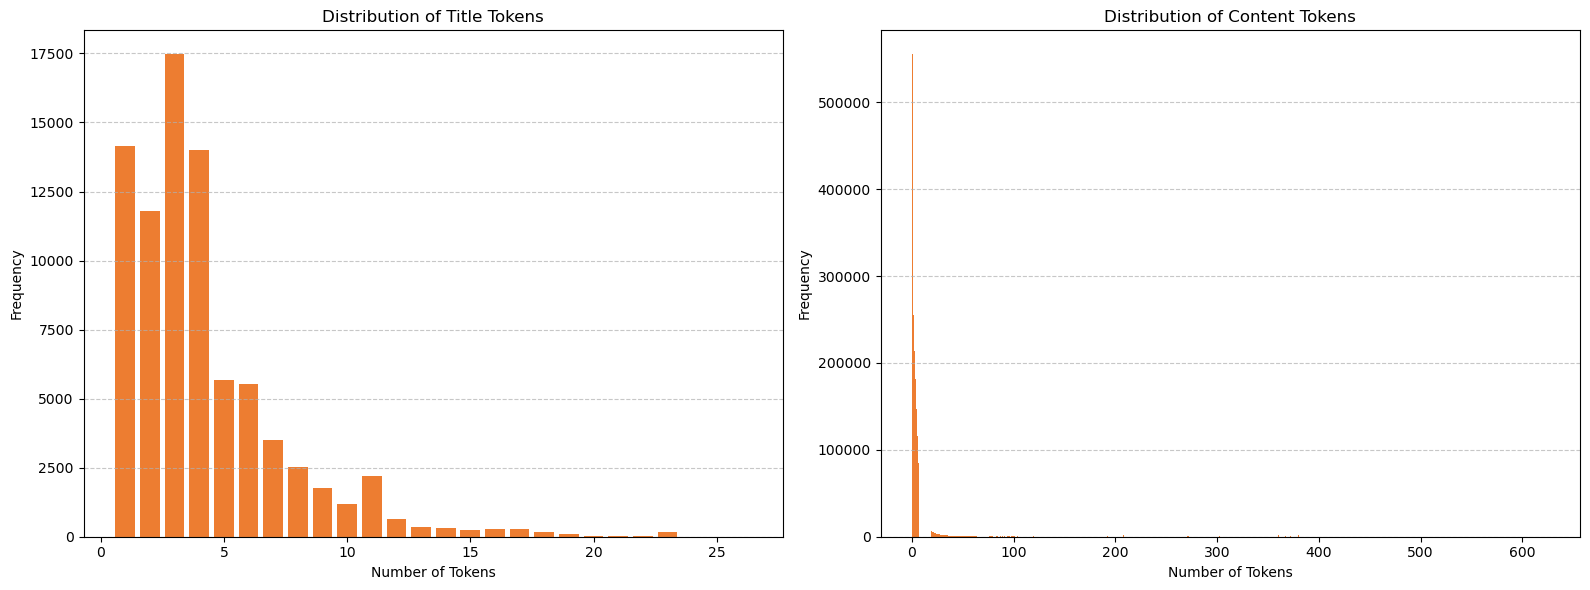

In [52]:
# Create a figure with 1 row and 2 columns
plt.figure(figsize=(16, 6))

# Subplot 1: Distribution of Title Tokens
plt.subplot(1, 2, 1)

# Splitting the 'title' column into words and calculating the length of each title
title_word_lengths = df['title'].str.split().str.len()

# Counting the occurrences of each title length
title_length_counts = title_word_lengths.value_counts()

# Plotting the results in a bar chart
plt.bar(title_length_counts.index, title_length_counts.values, color='#ed7d31')

# Adding labels and titles to the plot
plt.xlabel('Number of Tokens')
plt.ylabel('Frequency')
plt.title(f'Distribution of Title Tokens')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Subplot 2: Distribution of Content Tokens
plt.subplot(1, 2, 2)

# Splitting the 'content' column into words and calculating the length of each content
content_word_lengths = df['content'].str.split().str.len()[df['content'].str.split().str.len() < 1000]

# Counting the occurrences of each content length
content_length_counts = content_word_lengths.value_counts()
content_length_counts = content_length_counts[content_length_counts > 1]

# Plotting the results in a bar chart
plt.bar(content_length_counts.index, content_length_counts.values, color='#ed7d31')

# Adding labels and titles to the plot
plt.xlabel('Number of Tokens')
plt.ylabel('Frequency')
plt.title(f'Distribution of Content Tokens')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adjust the layout to prevent overlap
plt.tight_layout()

# Displaying the subplots
plt.show()


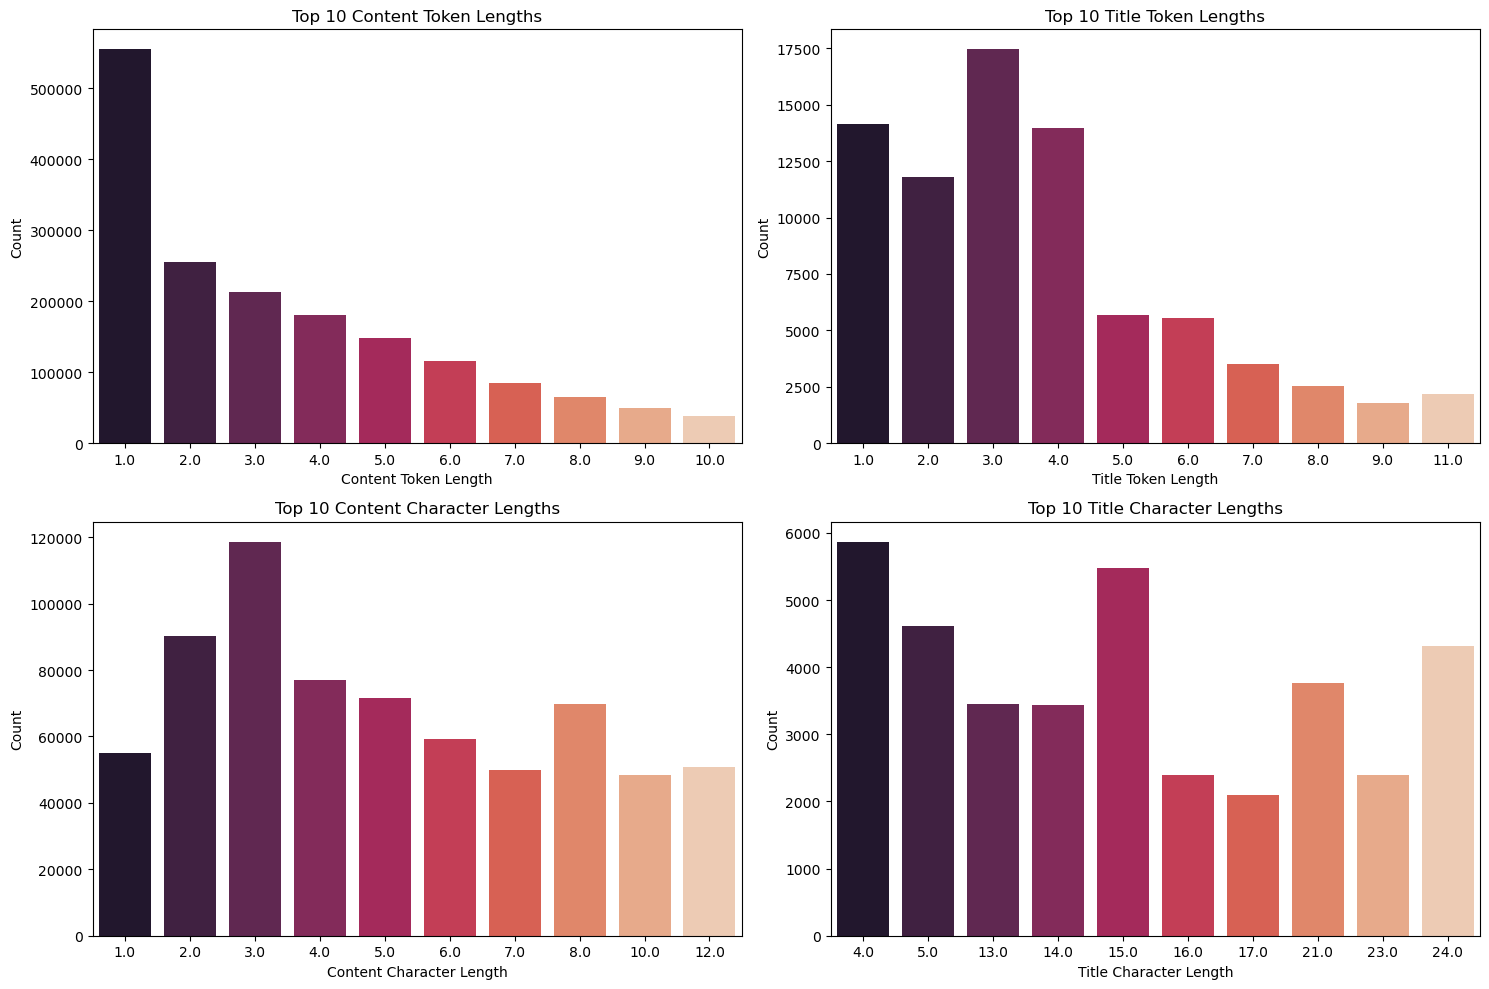

In [53]:
def plot_top_token_lengths(df):
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))  # Create a subplot with 2 rows and 2 columns

    # Loop through the columns 'content' and 'title'
    for idx, column_name in enumerate(['content', 'title']):
        # Split the column into tokens, count token lengths, and get value counts
        tokens = df[column_name].str.split().str.len().value_counts().reset_index()
        tokens_10 = tokens.head(10).sort_values(by='count', ascending=False)  # Sort in descending order

        # Create the bar plot in the corresponding subplot
        sns.barplot(data=tokens_10, x=column_name, y='count', palette='rocket', ax=axes[0, idx])
        axes[0, idx].set_xlabel(f'{column_name.capitalize()} Token Length')
        axes[0, idx].set_ylabel('Count')
        axes[0, idx].set_title(f'Top 10 {column_name.capitalize()} Token Lengths')

        # Calculate character lengths for the same column and get their value counts
        char_lengths = df[column_name].str.len().value_counts().reset_index()
        char_lengths_10 = char_lengths.head(10).sort_values(by='count', ascending=False)  # Sort in descending order

        # Create the bar plot for character lengths in the second row
        sns.barplot(data=char_lengths_10, x=column_name, y='count', palette='rocket', ax=axes[1, idx])
        axes[1, idx].set_xlabel(f'{column_name.capitalize()} Character Length')
        axes[1, idx].set_ylabel('Count')
        axes[1, idx].set_title(f'Top 10 {column_name.capitalize()} Character Lengths')

    plt.tight_layout()  # Ensure proper spacing between subplots
    plt.show()

plot_top_token_lengths(df)


#### In The content Column The highest Distribution of Token is 1 
- In which top 10 value count are below


In [54]:
# Extract single-word content and count occurrences
content_hig_token = df.content[df.content.str.split().str.len() == 1].value_counts().reset_index()


In [55]:
# Display the first 10 rows of the 'content_hig_token' DataFrame.
content_hig_token.head(10)


,content,count
0,$wa,10866
1,.bake,10174
2,.harvest,9855
3,bal,9767
4,.stealcookie,9086
5,$h,6220
6,a,5131
7,$w,5084
8,Ok,4963
9,?,4360


#### Calculate the mean length of content

In [56]:
# Calculate the mean length of strings in the 'content' column of the 'content_hig_token' DataFrame.
mean_length = content_hig_token.content.str.len().mean()
mean_length


21.60699526796994

**Content Character highest frequancy analysis**

In [57]:
# Filter the 'content' column of the DataFrame to select entries with a length of 3
# Then, count the occurrences of each unique value in the filtered data
result = df.content[df.content.str.len() == 3].value_counts()

In [58]:
# Filter the DataFrame to select rows where the length of 'content' is equal to 3
filtered_df = df[df.content.str.len() == 3]

# Count the occurrences of each unique value in the filtered 'content' column
value_counts = filtered_df['content'].value_counts()

# Display the top 10 value counts
top_10_counts = value_counts.head(10)


#### Title column Analysis

In [59]:
# Create a DataFrame 'Token_token_1' by filtering 'df.title' to include only entries with a single word in the title.
Token_token_1 = df.title[df.title.str.split().str.len() == 1].value_counts().reset_index()


In [60]:
Token_token_1

,title,count
0,hehe,5397
1,BBois,3225
2,trading,903
3,Trading,406
4,trade,279
...,...,...
653,aaa,1
654,Trading🤩,1
655,Chemistry,1
656,Ciosciaa-1/27/2023,1


#### In The Title Column The highest Distribution of Token is 3
- In which top 10 value count are below


In [61]:
# Filter titles with a word count of 3
title_hig_token = df.title[df.title.str.split().str.len() == 3].value_counts().reset_index()


In [63]:
title_hig_token.head(10)

,title,count
0,Theta Wins Only,3347
1,Theta Galactic Empire,2533
2,Kolo’s Future Korner,309
3,Balthius' Better Bazaar,291
4,trading my inv,163
5,Nick_OS—$500 account challenge,156
6,BIG TRADE ALERT!,145
7,trading perm Buddha,141
8,Basement’s Delta Bootcamp,140
9,MidJourney Bot Testing,139


#### Average character length for Title

In [66]:
# Calculate the mean length of titles in the 'title' column after converting them to title case
mean_title_length = title_hig_token.title.str.len().mean()
mean_title_length

17.07318022576878

#### Character highest frequancy analysis 4 and 15

In [67]:
# Filter rows in 'df' where the length of 'title' is 4
filtered_df = df[df.title.str.len() == 4]

# Count the occurrences of each unique value in the 'title' column
value_counts = filtered_df['title'].value_counts().reset_index()

value_counts

,title,count
0,hehe,5397
1,FD's,125
2,news,50
3,tree,43
4,post,37
...,...,...
70,🌋♾👉❔,1
71,2Leo,1
72,Winn,1
73,suii,1


In [68]:
# Filter the DataFrame to select rows where the 'title' column has a length of 15 characters.
filtered_titles = df[df['title'].str.len() == 15]

# Count the occurrences of each unique title and reset the index.
title_counts = filtered_titles['title'].value_counts().reset_index()

# Display the resulting DataFrame.
title_counts


,title,count
0,Theta Wins Only,3347
1,trading control,263
2,trading leopard,239
3,Rumy struggling,129
4,Trading Leopard,95
...,...,...
441,Who have budha?,1
442,Offer for venom,1
443,Daily fact #132,1
444,venom for dough,1
